Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [9]:
import yfinance as yf
import pandas as pd

In [10]:
tesla = yf.Ticker("TSLA")

In [11]:
tesla_share_price_data = tesla.history(period="max")
tesla_share_price_data.reset_index(inplace=True)

In [12]:
tesla_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [13]:
tesla_share_price_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3467,2024-04-09 00:00:00-04:00,172.910004,179.220001,171.919998,176.880005,103232700,0.0,0.0
3468,2024-04-10 00:00:00-04:00,173.039993,174.929993,170.009995,171.759995,84532400,0.0,0.0
3469,2024-04-11 00:00:00-04:00,172.550003,175.880005,168.509995,174.600006,94516000,0.0,0.0
3470,2024-04-12 00:00:00-04:00,172.339996,173.809998,170.360001,171.050003,64506600,0.0,0.0
3471,2024-04-15 00:00:00-04:00,170.240005,170.690002,161.380005,161.479996,99744400,0.0,0.0


Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [15]:
gme = yf.Ticker("GME")

In [16]:
gme_share_price_data = gme.history(period="max")
gme_share_price_data.reset_index(inplace=True)

In [17]:
gme_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [18]:
gme_share_price_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5575,2024-04-09 00:00:00-04:00,10.85,11.18,10.73,11.01,3514400,0.0,0.0
5576,2024-04-10 00:00:00-04:00,10.90,11.07,10.75,10.85,3546200,0.0,0.0
5577,2024-04-11 00:00:00-04:00,10.91,11.39,10.80,11.29,3802100,0.0,0.0
5578,2024-04-12 00:00:00-04:00,11.21,11.23,10.76,10.77,3196300,0.0,0.0
5579,2024-04-15 00:00:00-04:00,10.81,10.84,10.06,10.06,5071800,0.0,0.0


Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

<AxesSubplot:title={'center':'Tesla'}, xlabel='Date'>

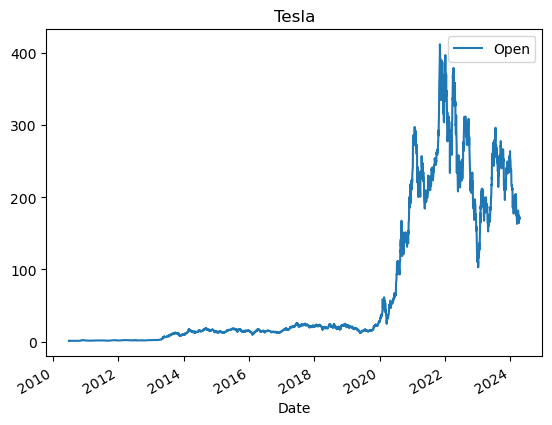

In [22]:
tesla_share_price_data.plot(x="Date", y="Open", title="Tesla")

Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

<AxesSubplot:title={'center':'GME'}, xlabel='Date'>

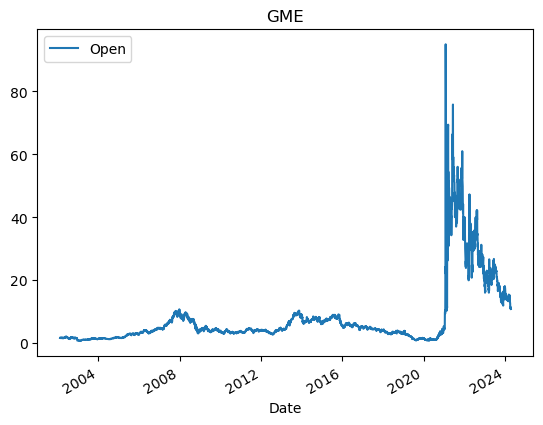

In [23]:
gme_share_price_data.plot(x="Date", y="Open", title="GME")